<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pandas" data-toc-modified-id="Pandas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pandas</a></span><ul class="toc-item"><li><span><a href="#Series" data-toc-modified-id="Series-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Series</a></span></li><li><span><a href="#Dataframe" data-toc-modified-id="Dataframe-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Dataframe</a></span></li><li><span><a href="#Sorting" data-toc-modified-id="Sorting-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Sorting</a></span></li></ul></li></ul></div>

# Pandas

## Series

In [1]:
import pandas as pd
import numpy as np

s = pd.Series(np.random.rand(5), index=['a', 'b', 'c', 'd', 'e'])
print(s)
print(s.index)

a    0.888723
b    0.123257
c    0.227679
d    0.803214
e    0.594275
dtype: float64
Index([u'a', u'b', u'c', u'd', u'e'], dtype='object')


In [2]:
# without passing any index, it will start series at zero
s = pd.Series(np.random.rand(5))
print(s)
print(s.index)

0    0.280388
1    0.721220
2    0.414474
3    0.746427
4    0.352178
dtype: float64
RangeIndex(start=0, stop=5, step=1)


In [3]:
# Using dictionary to create
d = {'a': 0., 'b': 1., 'c': 2.}
s = pd.Series(d)
print(s)
print(s.index)

a    0.0
b    1.0
c    2.0
dtype: float64
Index([u'a', u'b', u'c'], dtype='object')


In [4]:
s = pd.Series(
    d, index=[
        'b', 'c', 'd', 'a'
    ])  # 'd' is not available as key in dictionary, hence it will give NaN
print(s)
print(s.index)

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64
Index([u'b', u'c', u'd', u'a'], dtype='object')


In [5]:
s = pd.Series(5., index=['a', 'b', 'c', 'd', 'e'])
print(s)
print(s.index)

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64
Index([u'a', u'b', u'c', u'd', u'e'], dtype='object')


In [6]:
# without passing any index, it will start series at zero
s = pd.Series(np.random.rand(5))
print(s)
print(s[0])

0    0.779513
1    0.542535
2    0.900577
3    0.086257
4    0.657399
dtype: float64
0.7795134293022433


In [7]:
print(s[:3])

0    0.779513
1    0.542535
2    0.900577
dtype: float64


In [8]:
print("Median=", s.median())

('Median=', 0.6573991287583475)


In [9]:
print(s[
    s > s.median()])  # printing values which are greater than median of series

0    0.779513
2    0.900577
dtype: float64


In [10]:
s[[4, 3, 1]]

4    0.657399
3    0.086257
1    0.542535
dtype: float64

In [11]:
np.exp(s)

0    2.180411
1    1.720363
2    2.461022
3    1.090087
4    1.929767
dtype: float64

In [12]:
import pandas as pd
import numpy as np

s = pd.Series(np.random.rand(5), index=['a', 'b', 'c', 'd', 'e'])
print(s)
s['e'] = 12
print(s)  # check value of e, it should have been replaced by 12

a    0.080051
b    0.603833
c    0.300177
d    0.193077
e    0.283923
dtype: float64
a     0.080051
b     0.603833
c     0.300177
d     0.193077
e    12.000000
dtype: float64


In [13]:
s = s.rename("somename")
s.name

'somename'

## Dataframe

In [14]:
# Dictionary Key becomes Column and index becomes rows
d = {
    'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
    'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])
}

df = pd.DataFrame(d)
print(df)

   one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0


In [15]:
df = pd.DataFrame(d, index=['d','b','a'])
print(df)

   one  two
d  NaN  4.0
b  2.0  2.0
a  1.0  1.0


In [16]:
# if column does not exist it will return NaN for all column
df = pd.DataFrame(d, index=['d','b','a'], columns=['two','three'])
print(df)

   two three
d  4.0   NaN
b  2.0   NaN
a  1.0   NaN


In [17]:
print(df.index)
print(df.columns)

Index([u'd', u'b', u'a'], dtype='object')
Index([u'two', u'three'], dtype='object')


In [18]:
# Column values should be equal in length otherwise it will throw error
d={'one':[1.,2.,3.,4.],'two':[4.,3.,2.,1.]}

# Without specifying index
df = pd.DataFrame(d)
print(df)

# With index
df=pd.DataFrame(d,index=['a','b','c','d'])
print(df)

   one  two
0  1.0  4.0
1  2.0  3.0
2  3.0  2.0
3  4.0  1.0
   one  two
a  1.0  4.0
b  2.0  3.0
c  3.0  2.0
d  4.0  1.0


In [19]:
# Diffrent datatypes
data = np.zeros((2,), dtype=[('A','i4'),('B','f8'),('C','a10')])

print(np.dtype('i4'))
print(np.dtype('f8'))
print(np.dtype('a25'))

data[:] = [(1,2.,'Hello'),(2,3.,"World")]
df = pd.DataFrame(data)
print(df)

int32
float64
|S25
   A    B      C
0  1  2.0  Hello
1  2  3.0  World


In [20]:
df = pd.DataFrame(data, index=['first','second'])
print(df)

        A    B      C
first   1  2.0  Hello
second  2  3.0  World


In [21]:
df = pd.DataFrame(data, columns=['C','B','A'])
print(df)

       C    B  A
0  Hello  2.0  1
1  World  3.0  2


## Sorting

In [22]:
import pandas as pd
import numpy as np
unsorted_df = pd.DataFrame(np.random.randn(10,2), index=[1,4,6,2,3,5,9,8,0,7], columns=['col2','col1'])
print(unsorted_df)

       col2      col1
1  0.464552 -0.352129
4  1.228040  1.078722
6  1.488664 -0.515471
2 -0.378717 -0.528974
3 -1.167650  2.439173
5  0.741497 -1.594510
9  1.213545 -0.240344
8 -1.637905 -0.793561
0  0.492025  1.131519
7  1.192558 -1.593298


In [23]:
sorted_df = unsorted_df.sort_index() # Default ascending on row labels i.e. index
print(sorted_df)

       col2      col1
0  0.492025  1.131519
1  0.464552 -0.352129
2 -0.378717 -0.528974
3 -1.167650  2.439173
4  1.228040  1.078722
5  0.741497 -1.594510
6  1.488664 -0.515471
7  1.192558 -1.593298
8 -1.637905 -0.793561
9  1.213545 -0.240344


In [24]:
sorted_df = unsorted_df.sort_index(axis=1) # axis wise sorted i.e. columname wise
print(sorted_df)

       col1      col2
1 -0.352129  0.464552
4  1.078722  1.228040
6 -0.515471  1.488664
2 -0.528974 -0.378717
3  2.439173 -1.167650
5 -1.594510  0.741497
9 -0.240344  1.213545
8 -0.793561 -1.637905
0  1.131519  0.492025
7 -1.593298  1.192558


In [25]:
sorted_df = unsorted_df.sort_index(ascending=False) # in descending order of index
print(sorted_df)

       col2      col1
9  1.213545 -0.240344
8 -1.637905 -0.793561
7  1.192558 -1.593298
6  1.488664 -0.515471
5  0.741497 -1.594510
4  1.228040  1.078722
3 -1.167650  2.439173
2 -0.378717 -0.528974
1  0.464552 -0.352129
0  0.492025  1.131519


In [26]:
# sorting by col1 and if any values are same at col1 secondary preference will be given to col2
sorted_df = unsorted_df.sort_values(by=['col1','col2'])
print(sorted_df)

       col2      col1
5  0.741497 -1.594510
7  1.192558 -1.593298
8 -1.637905 -0.793561
2 -0.378717 -0.528974
6  1.488664 -0.515471
1  0.464552 -0.352129
9  1.213545 -0.240344
4  1.228040  1.078722
0  0.492025  1.131519
3 -1.167650  2.439173


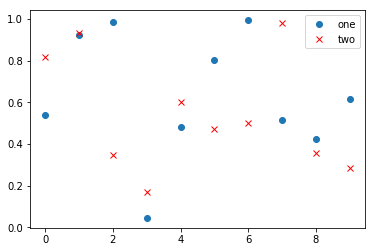

In [27]:
import pandas as pd
import numpy as np

d = {'one': np.random.rand(10), 'two': np.random.rand(10)}

df = pd.DataFrame(d)
%matplotlib inline
df.plot(style=['o', 'rx'])